In [1]:
import pandas as pd
# Common imports
import numpy as np
import os
import sklearn
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### CARGAR LOS DATOS

In [2]:
df = pd.read_csv(r'C:\Users\iauzm\OneDrive\Desktop\DATA SCIENCE\AUZMENDI\PROYECTO-ML\modelos\tabla_pred_1',index_col='Unnamed: 0')
print(df.shape)
df.head()

(1187, 61)


,pts_local,FGM_local,FGA_local,FG_PCT_local,FG3M_local,FG3A_local,FG3_PCT_local,FTM_local,FTA_local,FT_PCT_local,...,OUT_visitante,bpi_visitante,off_visitante,def_visitante,pbpi_visitante,OVR_visitante,DEF_visitante,TIER_1_visitante,TIER_2_visitante,TIER__visitante
0,107.0,41.0,90.0,0.456,10.0,29.0,0.345,15.0,20.0,0.750,...,91,1.481,1.627,-0.147,1.481,83,63,False,True,False
1,116.0,43.0,86.0,0.500,11.0,37.0,0.297,19.0,26.0,0.731,...,76,-10.147,-6.258,-3.890,-10.147,79,63,False,False,True
2,114.0,44.0,94.0,0.468,17.0,43.0,0.395,9.0,10.0,0.900,...,92,5.060,2.404,2.657,5.060,83,68,True,False,False
3,119.0,46.0,89.0,0.517,11.0,35.0,0.314,16.0,22.0,0.727,...,84,-0.617,-0.713,0.096,-0.617,82,68,False,True,False
4,94.0,34.0,100.0,0.340,8.0,31.0,0.258,18.0,22.0,0.818,...,83,4.609,0.104,4.505,4.609,82,62,True,False,False


### DECISION TREE
Este modelo busca tomar un primer contacto con el dataset, la feature importance, etc. 

In [3]:
# DIVIDO EN TRAIN Y TEST
train = df.iloc[:-246]
test = df.iloc[-246:]

In [4]:
X_train = train.drop(columns=['ganador_local'])
y_train = train['ganador_local']
X_test = test.drop(columns=['ganador_local'])
y_test = test['ganador_local']

tree_clf = DecisionTreeClassifier(max_depth= 3,
                                  random_state=42)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

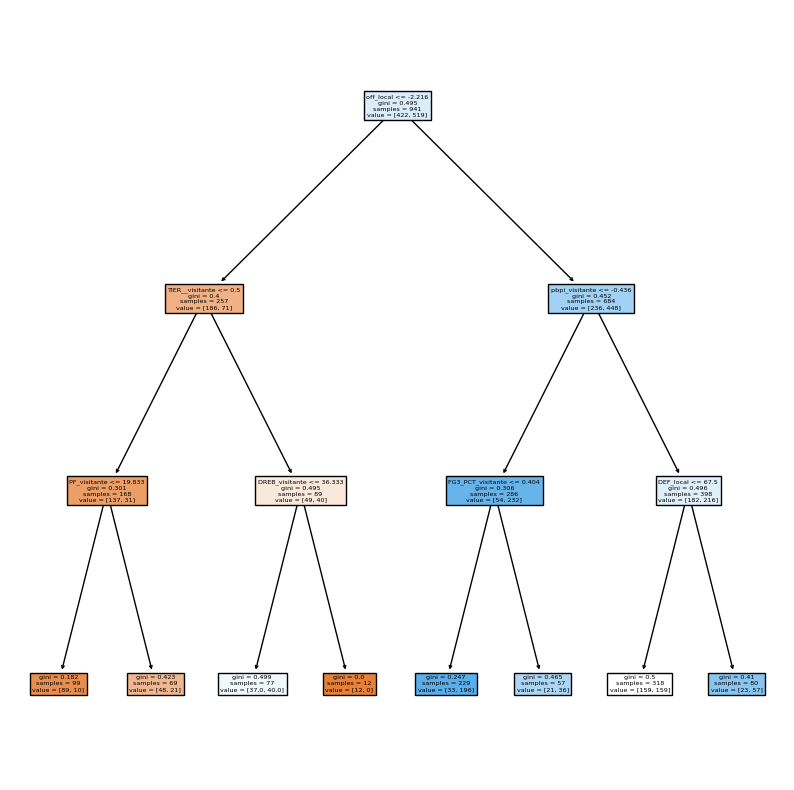

In [5]:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(tree_clf,
               feature_names=X_train.columns,
             
               filled = True);

In [6]:
features_names = X_train.columns

In [7]:
feature_importances = tree_clf.feature_importances_

In [8]:
for i in range(len(features_names)):
    if feature_importances[i]>0.001:
        print(features_names[i],feature_importances[i])

FG3_PCT_visitante 0.043713070455729794
DREB_visitante 0.05332931878517424
PF_visitante 0.03200047786271676
off_local 0.5099761897351232
DEF_local 0.054941111710704066
pbpi_visitante 0.228321617340152
TIER__visitante 0.0777182141103999


In [9]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

In [10]:
# ENTRENAMIENTO DEL ARBOL
tree_clf = DecisionTreeClassifier(max_depth= 3,
                                  random_state=42)
tree_clf.fit(X_train, y_train)


# COMPROBACIÓN DE LAS FEATURE IMPORTANCES
print('-'*50)
print('\n---FEATURE IMPORTANCES---')
features_names = X_train.columns
feature_importances = tree_clf.feature_importances_
for i in range(len(features_names)):
    if feature_importances[i]>0.001:
        print(features_names[i],round(feature_importances[i],3))
 
#  METRICAS
print('-'*50)
print('\n---MÉTRICAS---')
print('\n---TRAIN---')
preds = tree_clf.predict(X_train)
print("Score del modelo (accuracy):", round(tree_clf.score(X_train, y_train), 3))
print("Accuracy score:", round(accuracy_score(preds, y_train), 3))
print("Recall score:", round(recall_score(preds, y_train), 3))
print("Precision score:", round(precision_score(preds, y_train), 3))
print("F1 score:", round(f1_score(preds, y_train), 3))
print("AUC:", round(roc_auc_score(preds, y_train), 3))
print('\n---TEST---')
preds = tree_clf.predict(X_test)
print("Score del modelo (accuracy):", round(tree_clf.score(X_test, y_test), 3))
print("Accuracy score:", round(accuracy_score(preds, y_test), 3))
print("Recall score:", round(recall_score(preds, y_test), 3))
print("Precision score:", round(precision_score(preds, y_test), 3))
print("F1 score:", round(f1_score(preds, y_test), 3))
print("AUC:", round(roc_auc_score(preds, y_test), 3))

--------------------------------------------------

---FEATURE IMPORTANCES---
FG3_PCT_visitante 0.044
DREB_visitante 0.053
PF_visitante 0.032
off_local 0.51
DEF_local 0.055
pbpi_visitante 0.228
TIER__visitante 0.078
--------------------------------------------------

---MÉTRICAS---

---TRAIN---
Score del modelo (accuracy): 0.677
Accuracy score: 0.677
Recall score: 0.743
Precision score: 0.634
F1 score: 0.684
AUC: 0.681

---TEST---
Score del modelo (accuracy): 0.606
Accuracy score: 0.606
Recall score: 0.693
Precision score: 0.515
F1 score: 0.591
AUC: 0.619


### VALORACIÓN DE LOS RESULTADOS
Teniendo en cuenta que que esperaba un 0.5 clavado, 0.6 ya es algo. 
* Las feature_importances no tienen ningún sentido, así que deduzco que ha dado 0.6 por puro azar.
    * que la columna con el daot de la ofensiva_local , tiene sentido, pero debería importar también la off_visitante y no es así.
    * Lo mismo sucede con bpi.
  
